<a href="https://colab.research.google.com/github/The-DarK-os/Neural-networks/blob/main/gans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

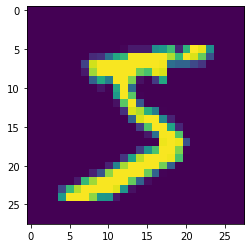

In [3]:
plt.imshow(X_train[0])

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
only_zeros = X_train[y_train==0]

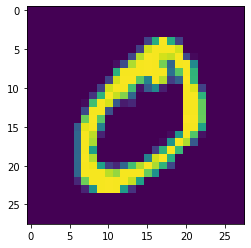

In [6]:
plt.imshow(only_zeros[0])

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
only_zeros.shape

(5923, 28, 28)

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(150,activation='relu'))

discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [10]:
28*28

784

In [11]:
coding_size = 100
generator = Sequential()
generator.add(Dense(100,activation='relu',input_shape=[coding_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

In [12]:
GAN = Sequential([generator,discriminator])

In [13]:
discriminator.trainable = False

In [14]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [15]:
batch_size = 32
my_data = only_zeros 
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [16]:
print(type(dataset))

<class 'tensorflow.python.data.ops.dataset_ops.ShuffleDataset'>


In [17]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [18]:
epochs = 1

In [19]:
GAN.layers

In [20]:
for i in range(0,2):
  GAN.layers[i].summary()
  print('\n')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 150)               15150     
                                                                 
 dense_5 (Dense)             (None, 784)               118384    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)        

In [30]:
generator,discriminator = GAN.layers

for epoch in range(epochs):
  print(f"Currently on Epoch {epoch+1}")
  i = 0
  for X_batch in dataset:
    i = i+1
    if(i%100 == 0):
      print(f"\t Currenly on batch number {i} of {len(my_data)//batch_size}")
    noise = tf.random.normal(shape=[batch_size,coding_size])
    gen_images = generator(noise)
    X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
    y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size) 
    discriminator.trainable = True
    discriminator.train_on_batch(X_fake_vs_real,y1)

    noise = tf.random.normal(shape=[batch_size,coding_size])
    y2 = tf.constant([[1.0]]*batch_size)
    discriminator.trainable=False
    GAN.train_on_batch(noise,y2)

Currently on Epoch 1
	 Currenly on batch number 100 of 185


In [31]:
noise = tf.random.normal(shape=[10,coding_size])

In [32]:
noise.shape

TensorShape([10, 100])

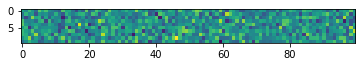

In [24]:
plt.imshow(noise)

In [33]:
images = generator(noise)
images.shape

TensorShape([10, 28, 28])

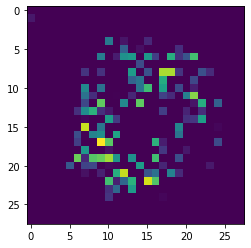

In [34]:
plt.imshow(images[0])

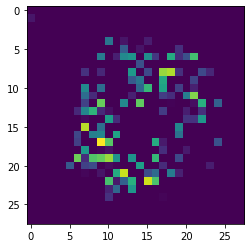

In [35]:
plt.imshow(images[7])